Import the modules that will be used.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 11.1

Determine by counting the number of mathematical operations the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$.

This is a reasoning exercise - you do not need to write a program. Express your answers in text and using LaTeX in a Markdown cell.


### Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

1. There are $n$ multiplications and $n-1$ additions to perform, so the complexity is $O(n)$.
2. There are $n$ multiplications and $n-1$ additions to perform over $n$ rows, so the complexity is $O(n^2)$.
3. There are $n$ multiplications and $n-1$ additions to perform over $n$ rows and $n$ columns, so the complexity is $O(n^3)$.

## Exercise 11.2

For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

### Solution

Recall the factorial algorithm from Activity 04.4:

In [2]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return factorial(n - 1)*n

The function calls itself (recursively) $n$ times, hence it has complexity $O(n)$. We test this below and plot
the times.

C:\Users\danie\AppData\Local\Temp\ipykernel_23376\1108553842.py:5: RuntimeWarning: overflow encountered in scalar multiply
  return factorial(n - 1)*n


log-log gradient: 0.852954194754579


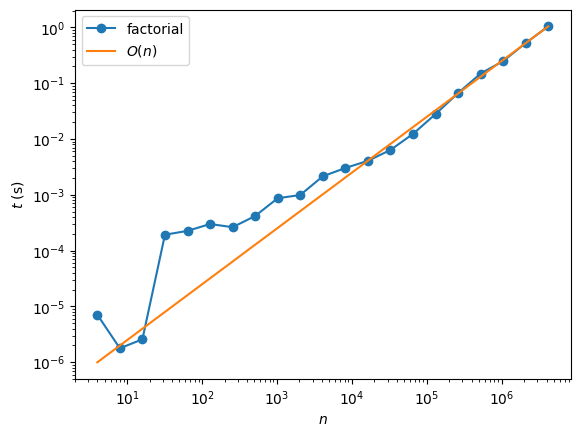

In [3]:
import sys
sys.setrecursionlimit(1000000000)

# Create array of problem sizes n we want to test
N = 2**np.arange(2, 23)

# Initialise an empty array to stores times for plotting
times = []

# Time the search for each problem size
for n in N:

    # Time search function (repeating 3 times) to find a random integer in x[:n]
    t = %timeit -q -n4 -r1 -o factorial(n)

    # Store best case time
    times.append(t.best)

# calculate the gradient of the log-log graph; should be 1 as we expect time to be proportional to n^1
N_log = np.log10(N)
times_log = np.log10(times)
bestfitcoefficients_log = np.polyfit(N_log, times_log, 1)
print('log-log gradient:', bestfitcoefficients_log[0])

# plot the times taken on a log-log graph
plt.loglog(N, times, marker='o', label='factorial')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

# show the best-fit line
bestfitcoefficients = np.polyfit(N, times, 1)
lineofbestfit = np.poly1d([bestfitcoefficients[0], 0.0])(N)
plt.loglog(N, lineofbestfit, label='$O(n)$')

# Add legend
plt.legend(loc=0)

plt.show()

## Exercise 11.3

Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:

In [4]:
n = 100
A = np.random.rand(n, n)

and the determinant can be computed by:

In [5]:
det = np.linalg.slogdet(A)

Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime.

### Solution

Time computation of determinant:

In [6]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(4, 13)
 
def det(matrix):
    return np.linalg.slogdet(matrix)

# Initialise an empty array to stores times for plotting
times = []

# Time the search for each problem size
for n in N:

    # Time search function (repeating 3 times) to find a random integer in x[:n]
    A = np.random.rand(n, n)
    t = %timeit -q -n4 -r1 -o det(A)

    # Store best case time
    times.append(t.best)


Plot result:

log-log gradient: 1.9933887620725983


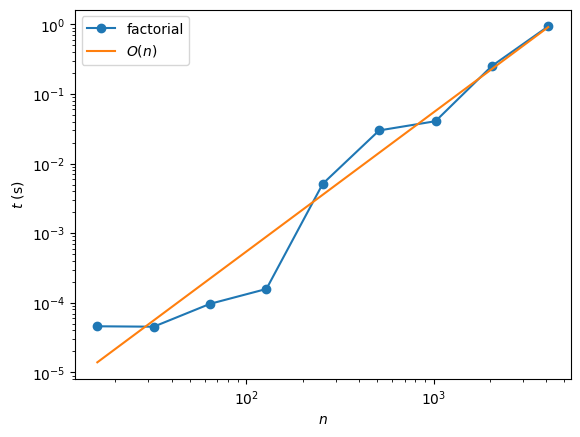

In [7]:
# calculate the gradient of the log-log graph; should be 1 as we expect time to be proportional to n^1
N_log = np.log10(N)
times_log = np.log10(times)
bestfitcoefficients_log = np.polyfit(N_log, times_log, 1)
print('log-log gradient:', bestfitcoefficients_log[0])

# plot the times taken on a log-log graph
plt.loglog(N, times, marker='o', label='factorial')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

# show the best-fit line
bestfitcoefficients = np.polyfit(N, times, 2)
lineofbestfit = np.poly1d([bestfitcoefficients[0], 0.0, 0.0])(N)
plt.loglog(N, lineofbestfit, label='$O(n)$')

# Add legend
plt.legend(loc=0)

plt.show()